# fun_control_init

In [ ]:
from spotPython.utils.init import fun_control_init
fun_control = fun_control_init(_L_in=64, _L_out=11, num_workers=0, device=None)
fun_control

In [ ]:
import pandas as pd

def class_attributes_to_dataframe(class_obj):
    # Get the attributes and their values of the class object
    attributes = [attr for attr in dir(class_obj) if not callable(getattr(class_obj, attr)) and not attr.startswith("__")]
    values = [getattr(class_obj, attr) for attr in attributes]
    
    # Create a DataFrame from the attributes and values
    df = pd.DataFrame({'Attribute Name': attributes, 'Attribute Value': values})
    
    return df

# Example usage:
class MyClass:
    def __init__(self):
        self.name = "John"
        self.age = 30
        self.salary = 50000

my_instance = MyClass()
df = class_attributes_to_dataframe(my_instance)
print(df)



In [ ]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
# number of initial points:
ni = 7
# number of points
n = 10

fun = analytical().fun_sphere
lower = np.array([-1])
upper = np.array([1])
design_control={"init_size": ni}

spot_1 = spot.Spot(fun=fun,
            lower = lower,
            upper= upper,
            fun_evals = n,
            show_progress=True,
            design_control=design_control,)
spot_1.run()


In [ ]:
from sys import stdout
df = spot_1.class_attributes_to_dataframe()
stdout.write(df.to_string())

In [ ]:
from river import datasets
from river import evaluate
from river.linear_model import LogisticRegression
from river import metrics
from river import optim
from river import preprocessing

dataset = datasets.Phishing()

model = (
    preprocessing.StandardScaler() |
    LogisticRegression()
)

metric = metrics.Accuracy()

evaluate.progressive_val_score(dataset, model, metric)


# Load CSV

In [ ]:
from spotPython.data.csvdataset import CSVDataset
# dataset = CSVDataset(csv_file='./data/spotPython/data.csv', target_column='prognosis')
dataset = CSVDataset(target_column='prognosis')
print(dataset.data.shape)
print(dataset.targets.shape)            

In [ ]:
dataset.extra_repr()

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 3
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# CSV Data set VBDP

In [ ]:
# load the csv_file='./data/spotPython/data.csv' as a pandas df and save it as a pickle file
import pandas as pd
df = pd.read_csv('./data/spotPython/data.csv')
df.to_pickle('./data/spotPython/data.pkl')


In [ ]:
from spotPython.data.csvdataset import CSVDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# PyHcf


In [ ]:
from pyhcf.data.daten_sensitive import DatenSensitive
from pyhcf.utils.names import get_short_parameter_names
daten = DatenSensitive()
df = daten.load()
names =  df.columns
names = get_short_parameter_names(names)
# rename columns with short names
df.columns = names
df.head()
# save the df as a csv file
df.to_csv('./data/spotPython/data_sensitive.csv', index=False)
# save the df as a pickle file
df.to_pickle('./data/spotPython/data_sensitive.pkl')
# remove all rows with NaN values
df = df.dropna()
# save the df as a csv file
df.to_csv('./data/spotPython/data_sensitive_rmNA.csv', index=False)
# save the df as a pickle file
df.to_pickle('./data/spotPython/data_sensitive_rmNA.pkl')


# PyHcf data loading

In [ ]:
# from spotPython.light.csvdataset import CSVDataset
# import torch
# dataset = CSVDataset(csv_file='./data/spotPython/data_sensitive.csv', target_column='N', feature_type=torch.float32, target_type=torch.float32)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5000
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     # print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

In [ ]:
# from spotPython.light.csvdataset import CSVDataset
# import torch
# dataset = CSVDataset(csv_file='./data/spotPython/data_sensitive.csv', target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=False)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5000
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     # print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

# Pickle data loading

In [ ]:
from spotPython.data.pkldataset import PKLDataset
import torch
dataset = PKLDataset(target_column='prognosis', feature_type=torch.long)

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Data Sensitive

In [ ]:
from spotPython.light.pkldataset import PKLDataset
import torch
dataset = PKLDataset(pkl_file='./data/spotPython/data_sensitive.pkl', target_column='A', feature_type=torch.long, rmNA=False)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

In [ ]:
from spotPython.data.pkldataset import PKLDataset
import torch
dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Test lightdatamodule

In [ ]:
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.csvdataset import CSVDataset
from spotPython.data.pkldataset import PKLDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
# dataset = PKLDataset(directory="./data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)
print(len(dataset))

In [ ]:
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=7)

In [ ]:
data_module.setup()

In [ ]:
print(f"Training set size: {len(data_module.data_train)}")

In [ ]:
print(f"Validation set size: {len(data_module.data_val)}")

In [ ]:
print(f"Test set size: {len(data_module.data_test)}")

# Set the DataModule in fun_control 

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_data_module
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.csvdataset import CSVDataset
from spotPython.data.pkldataset import PKLDataset
import torch
fun_control = fun_control_init()
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=7)
dm.setup()
set_data_module(fun_control=fun_control,
                data_module=dm)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


## same with the sensitive data set

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_data_module
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.pkldataset import PKLDataset
import torch
fun_control = fun_control_init()
dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=77)
dm.setup()
set_data_module(fun_control=fun_control,
                data_module=dm)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


## same, but VBDO data set

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_data_module
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.csvdataset import CSVDataset
import torch
fun_control = fun_control_init()
dataset = CSVDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/VBDP/", filename="train.csv",target_column='prognosis', feature_type=torch.long)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=77)
dm.setup()
set_data_module(fun_control=fun_control,
                data_module=dm)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


# load Hyperdict

In [ ]:
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
lhd = LightHyperDict()
lhd.hyper_dict
user_lhd = LightHyperDict(filename="user_hyper_dict.json", directory="./hyperdict/")
user_lhd.hyper_dict


# add core model to fun control

In [ ]:
from spotPython.light.netlightbase import NetLightBase
from spotPython.utils.init import fun_control_init
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightBase,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
fun_control["core_model"].__name__

In [ ]:
# check if the fun_control["core_model_hyper_dict"] is a LightHyperDict
isinstance(fun_control["core_model_hyper_dict"], dict)

# Test netlightregression

In [1]:
import torch
import numpy as np
from spotPython.spot import spot
from math import inf
from spotPython.utils.init import fun_control_init
from spotPython.utils.file import get_experiment_name, get_spot_tensorboard_path
from spotPython.utils.device import getDevice
from spotPython.hyperparameters.values import set_data_set
from spotPython.data.pkldataset import PKLDataset
from spotPython.light.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
from spotPython.hyperparameters.values import modify_hyper_parameter_bounds
from spotPython.hyperparameters.values import modify_hyper_parameter_levels
from spotPython.fun.hyperlight import HyperLight
from spotPython.hyperparameters.values import (get_bound_values,
    get_var_name,
    get_var_type,)
from spotPython.utils.eda import gen_design_table
from spotPython.light.utils import get_tuned_architecture
from spotPython.light.traintest import test_model
from spotPython.light.traintest import load_light_from_checkpoint

MAX_TIME = 1
INIT_SIZE = 5
WORKERS = 0
PREFIX="031"

experiment_name = get_experiment_name(prefix=PREFIX)
fun_control = fun_control_init(
    spot_tensorboard_path=get_spot_tensorboard_path(experiment_name),
    num_workers=WORKERS,
    device=getDevice(),
    _L_in=133,
    _L_out=1,
    TENSORBOARD_CLEAN=True)

dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=True)
set_data_set(fun_control=fun_control,
                data_set=dataset)



add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
modify_hyper_parameter_bounds(fun_control, "l1", bounds=[5,8])
modify_hyper_parameter_bounds(fun_control, "epochs", bounds=[2,3])
modify_hyper_parameter_bounds(fun_control, "batch_size", bounds=[2, 8])
modify_hyper_parameter_levels(fun_control, "optimizer",["Adam", "AdamW", "Adamax", "NAdam"])

print(gen_design_table(fun_control))

var_type = get_var_type(fun_control)
var_name = get_var_name(fun_control)
lower = get_bound_values(fun_control, "lower")
upper = get_bound_values(fun_control, "upper")
fun = HyperLight(log_level=10).fun
spot_tuner = spot.Spot(fun=fun,
                       log_level=10,
                   lower = lower,
                   upper = upper,
                   fun_evals = inf,
                   max_time = MAX_TIME,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   var_type = var_type,
                   var_name = var_name,
                   show_progress= True,
                   fun_control = fun_control,
                   design_control={"init_size": INIT_SIZE},
                   surrogate_control={"noise": True,
                                      "min_theta": -4,
                                      "max_theta": 3,
                                      "n_theta": len(var_name),
                                      "model_fun_evals": 10_000,
                                      })
spot_tuner.run()

Seed set to 42
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument

| name           | type   | default   |   lower |   upper | transform             |
|----------------|--------|-----------|---------|---------|-----------------------|
| l1             | int    | 3         |     5   |    8    | transform_power_2_int |
| epochs         | int    | 4         |     2   |    3    | transform_power_2_int |
| batch_size     | int    | 4         |     2   |    8    | transform_power_2_int |
| act_fn         | factor | ReLU      |     0   |    5    | None                  |
| optimizer      | factor | SGD       |     0   |    3    | None                  |
| dropout_prob   | float  | 0.01      |     0   |    0.25 | None                  |
| lr_mult        | float  | 1.0       |     0.1 |   10    | None                  |
| patience       | int    | 2         |     2   |    6    | transform_power_2_int |
| initialization | factor | Default   |     0   |    2    | None                  |
fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_mo

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (12) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epochs=8` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 5.2 K 
--------------------------------------
5.2 K     Trainable 

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            192.0380096435547
        val_loss             192.0380096435547
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 192.0380096435547, 'hp_metric': 192.0380096435547}
fun: train_model returned
fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


`Trainer.fit` stopped: `max_epochs=4` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 31.7 K
--------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (48) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric               188761008.0
        val_loss                188761008.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 188761008.0, 'hp_metric': 188761008.0}
fun: train_model returned
fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


`Trainer.fit` stopped: `max_epochs=4` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 12.3 K
--------------------------------------
12.3 K    Trainable params
0         Non-trainable params
12.3 K    Total params
0.049     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            326.2699279785156
        val_loss             326.2699279785156
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 326.2699279785156, 'hp_metric': 326.2699279785156}
fun: train_model returned
fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 12.3 K
--------------------------------------
12.3 K    Trainable params
0         Non-trainable params
12.3 K    Total params
0.049     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (6) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epochs=8` reached.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                637604.0
        val_loss                 637604.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 637604.0, 'hp_metric': 637604.0}
fun: train_model returned


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
`Trainer.fit` stopped: `max_epochs=8` reached.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric             6045.1591796875
        val_loss              6045.1591796875
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 6045.1591796875, 'hp_metric': 6045.1591796875}
fun: train_model returned
spotPython tuning: 192.0380096435547 [##--------] 20.85% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epoch

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric               117985112.0
        val_loss                117985112.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 117985112.0, 'hp_metric': 117985112.0}
fun: train_model returned
spotPython tuning: 192.0380096435547 [##--------] 22.94% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 31.7 K
--------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epoch

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric               55424216.0
        val_loss                55424216.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 55424216.0, 'hp_metric': 55424216.0}
fun: train_model returned
spotPython tuning: 192.0380096435547 [##--------] 24.46% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epoc

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            350.8734436035156
        val_loss             350.8734436035156
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 350.8734436035156, 'hp_metric': 350.8734436035156}
fun: train_model returned
spotPython tuning: 192.0380096435547 [###-------] 30.20% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 5.2 K 
--------------------------------------
5.2 K     Trainable params
0         Non-trainable params
5.2 K     Total params
0.021     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epoc

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric              204251.328125
        val_loss               204251.328125
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 204251.328125, 'hp_metric': 204251.328125}
fun: train_model returned
spotPython tuning: 192.0380096435547 [####------] 36.05% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 5.2 K 
--------------------------------------
5.2 K     Trainable params
0         Non-trainable params
5.2 K     Total params
0.021     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
`Trainer.fit` stopped: `max_epochs=8` reached.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                7630090.5
        val_loss                 7630090.5
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 7630090.5, 'hp_metric': 7630090.5}
fun: train_model returned
spotPython tuning: 192.0380096435547 [######----] 55.73% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (12) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            402.1930847167969
        val_loss             402.1930847167969
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 402.1930847167969, 'hp_metric': 402.1930847167969}
fun: train_model returned
spotPython tuning: 192.0380096435547 [######----] 59.20% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (48) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epoc

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric           150.07376098632812
        val_loss            150.07376098632812
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 150.07376098632812, 'hp_metric': 150.07376098632812}
fun: train_model returned
spotPython tuning: 150.07376098632812 [#######---] 68.36% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [#######---] 70.55% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [#######---] 72.36% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [#######---] 74.18% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [########--] 75.95% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [########--] 77.64% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [########--] 79.32% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [########--] 81.13% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [########--] 82.96% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [########--] 84.71% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [#########-] 86.51% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [#########-] 88.24% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [#########-] 89.99% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [#########-] 91.70% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [#########-] 93.45% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [##########] 95.19% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [##########] 96.94% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [##########] 98.76% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory runs/lightning_logs/-1707164311427968253/checkpoints exists and is not empty.

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


fun: Calling train_model
torch.Size([2381, 133])
torch.Size([2381])
train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
fun: train_model returned
spotPython tuning: 150.07376098632812 [##########] 100.00% Done...



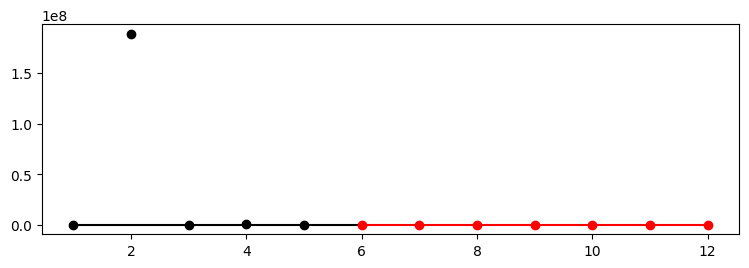

In [2]:
spot_tuner.plot_progress(log_y=False, filename=None)

In [3]:
print(gen_design_table(fun_control=fun_control, spot=spot_tuner))

| name           | type   | default   |   lower |   upper |   tuned | transform             |   importance | stars   |
|----------------|--------|-----------|---------|---------|---------|-----------------------|--------------|---------|
| l1             | int    | 3         |     5.0 |     8.0 |     8.0 | transform_power_2_int |         0.00 |         |
| epochs         | int    | 4         |     2.0 |     3.0 |     3.0 | transform_power_2_int |         0.00 |         |
| batch_size     | int    | 4         |     2.0 |     8.0 |     3.0 | transform_power_2_int |         0.14 | .       |
| act_fn         | factor | ReLU      |     0.0 |     5.0 |     2.0 | None                  |         0.00 |         |
| optimizer      | factor | SGD       |     0.0 |     3.0 |     0.0 | None                  |         0.00 |         |
| dropout_prob   | float  | 0.01      |     0.0 |    0.25 |     0.0 | None                  |         0.00 |         |
| lr_mult        | float  | 1.0       |     0.1 

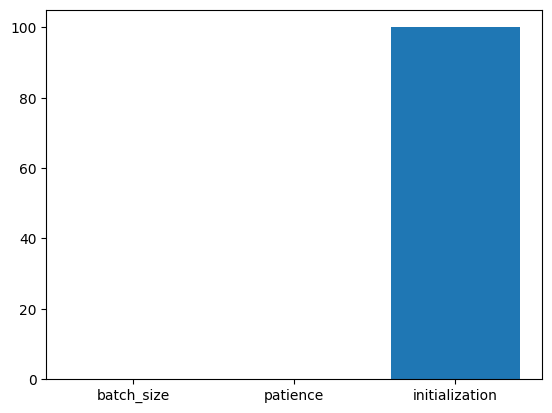

In [4]:
spot_tuner.plot_importance(threshold=0.025, filename=None)

In [5]:
config = get_tuned_architecture(spot_tuner, fun_control)

In [6]:
test_model(config, fun_control)

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 92.0 K
--------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)



******
In test_model: torch.Size([2381, 133])
torch.Size([2381])
Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (48) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epoc

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric               621.296875
        val_loss                621.296875
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
test_model result: {'val_loss': 621.296875, 'hp_metric': 621.296875}


KeyError: 'mae_loss'

In [ ]:
model_loaded = load_light_from_checkpoint(config, fun_control)